## Example 7 - Convergence Check With Boundary Layer Elements

For this example, we want to run MPT-Calculator over the frequency range $10^1$ rad/s to $10^8$ rad/s in 80 logarithmically spaced steps. We will consider a homogeneous sphere, defined in [OCC_step_cube_prism.py](../OCC_Geometry/OCC_step_cube_prism.py). The object has conductivity $\sigma_* = 1 \times 10^6$ S/m, relative permeability $\mu_r = 32$, and object size $\alpha = 1\times 10^{-2}$.

We need to run the simulation with these settings, and check that the solution we obtain is converged for the entire frequency range of interest. To do this, we will iterate MPT-Calculator for increasing orders $p=2,3,4$.

In [1]:
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path= r'C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator'

os.chdir(Your_Path)
os.getcwd()

from main import main
from matplotlib import pyplot as plt

Similar to Example [6](./Example_6_Adaptive_POD_with_step_geometry_and_boundary_layers.ipynb) we assign 2 layers of prismatic elements of thickness $\tau$ and $2\tau$, with $\tau$ being the normalised skin depth. We also specify that we desire a homogeneous cube, so the material for the boundary layers matches the material for the cube interior. These settings can easily be updated in the OCC file.

Here, we are assigning parameters for the frequency sweep

In [2]:
geometry = 'OCC_step_cube_prism.py'
start = 1
stop = 8
points = 80
mesh_coarseness = 'coarse'
start_stop = (start, stop, points)

and run $\texttt{main}$ for the different orders and superimpose the eigenvalues. Here, we just show an example for the first eigenvalue. In the case of a cube, all 3 eigenvalues should be identical.

Updated alpha from OCC file. Alpha=0.001
OCC_step_cube_prism.geo
Mesh Contains Prisms? True
N Prisms: 2515, N Tets: 27209


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 29724 elements


Solving Theta0: 100%|██████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|██████████████████████████████████████████████| 13/13 [09:13<00:00, 42.57s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 11
manually closed poolder model
 reduced order systems solved
 frequency sweep complete
Updated alpha from OCC file. Alpha=0.001
OCC_step_cube_prism.geo
Mesh Contains Prisms? True
N Prisms: 2515, N Tets: 27209


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 29724 elements


Solving Theta0: 100%|██████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|██████████████████████████████████████████████| 13/13 [21:09<00:00, 97.67s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 11
manually closed poolder model
 reduced order systems solved
 frequency sweep complete
Updated alpha from OCC file. Alpha=0.001
OCC_step_cube_prism.geo
Mesh Contains Prisms? True
N Prisms: 2515, N Tets: 27209


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 29724 elements


Solving Theta0: 100%|██████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|█████████████████████████████████████████████| 13/13 [54:29<00:00, 251.52s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 11
manually closed poolder model
 reduced order systems solved
 frequency sweep complete


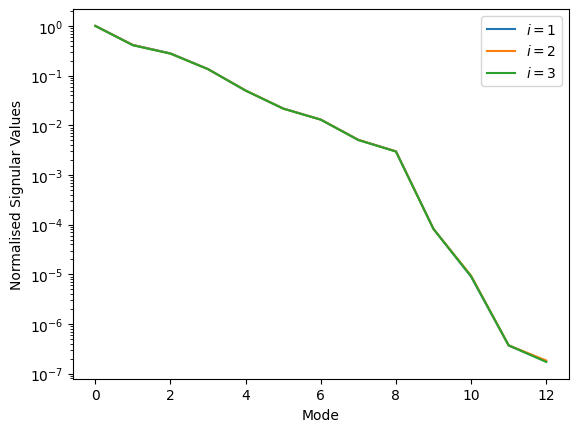

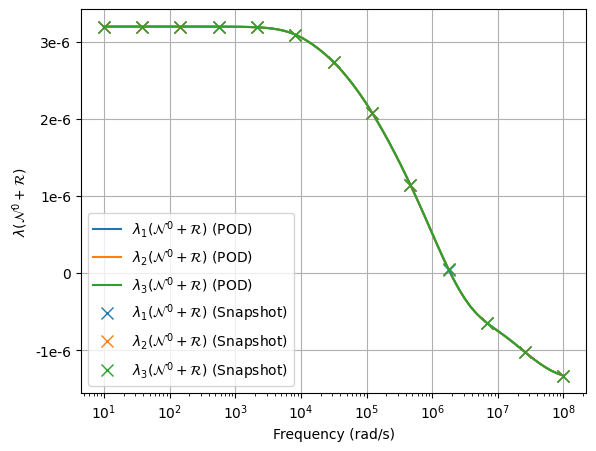

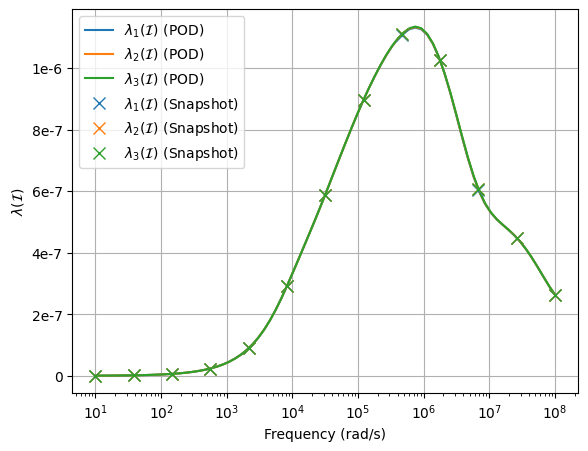

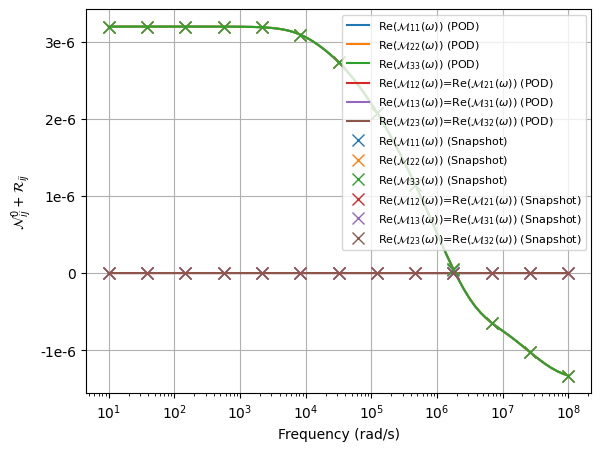

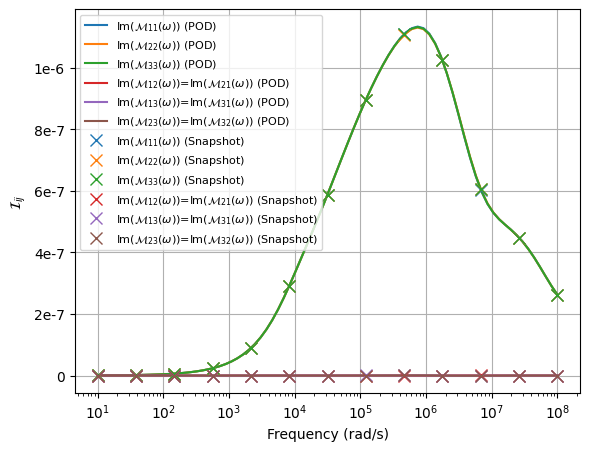

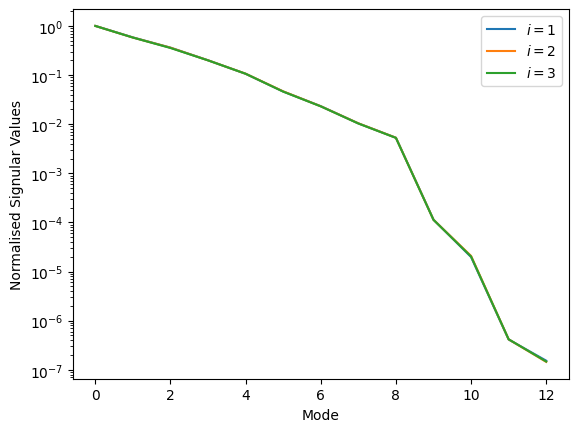

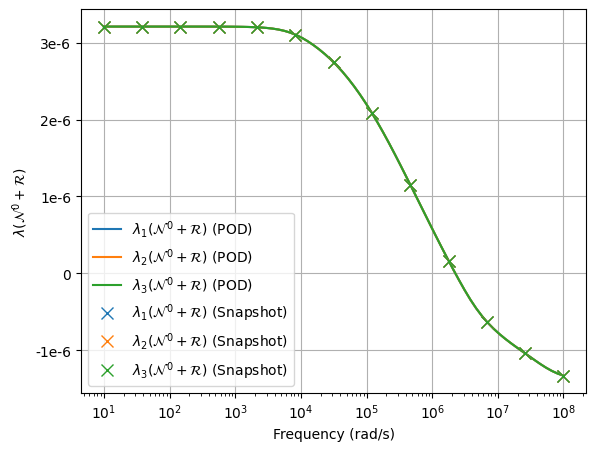

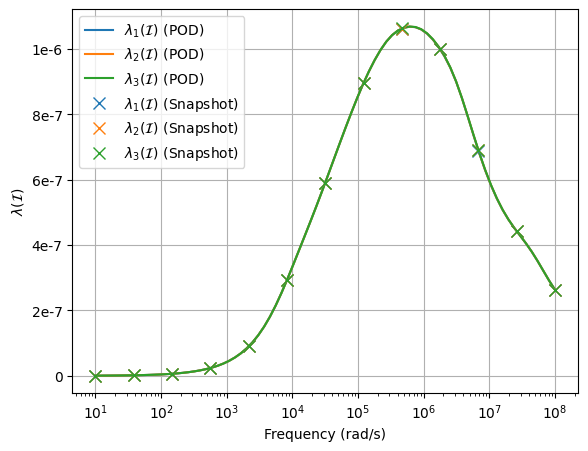

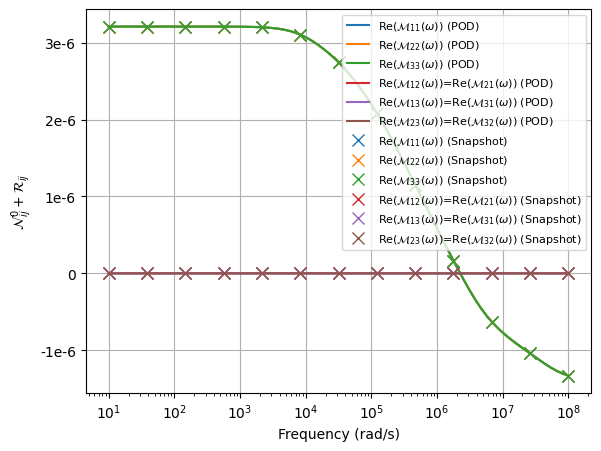

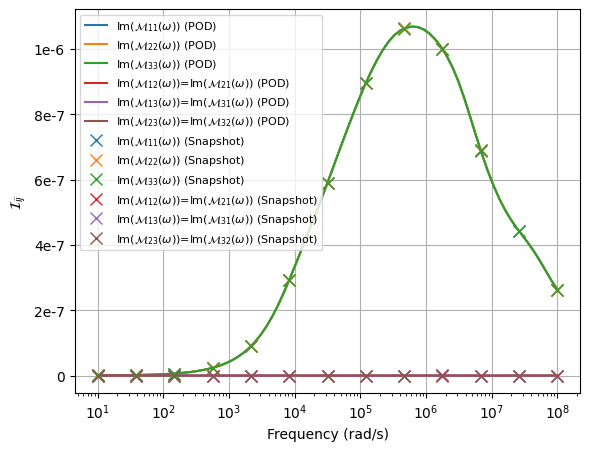

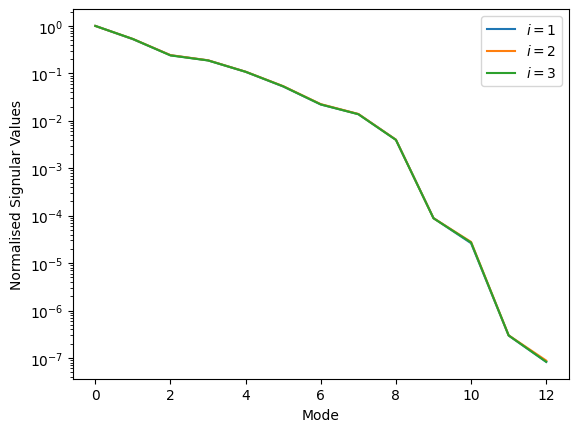

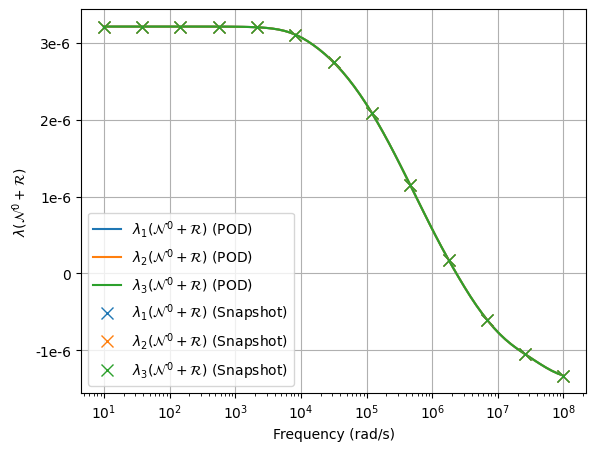

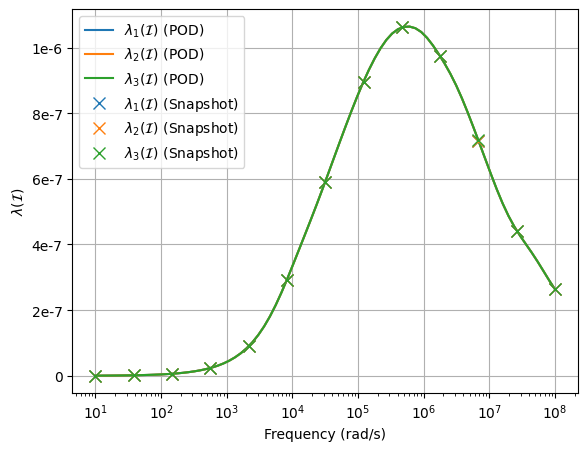

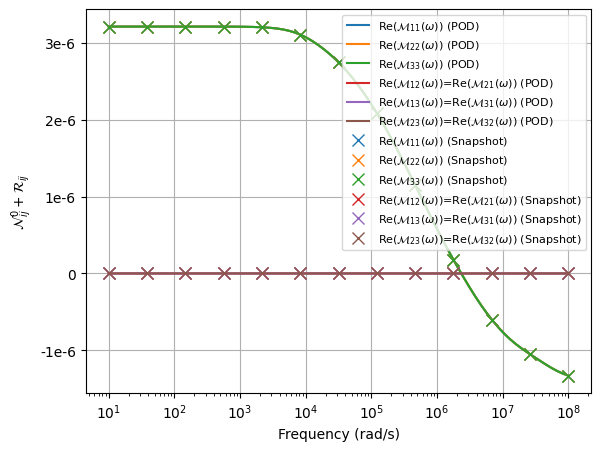

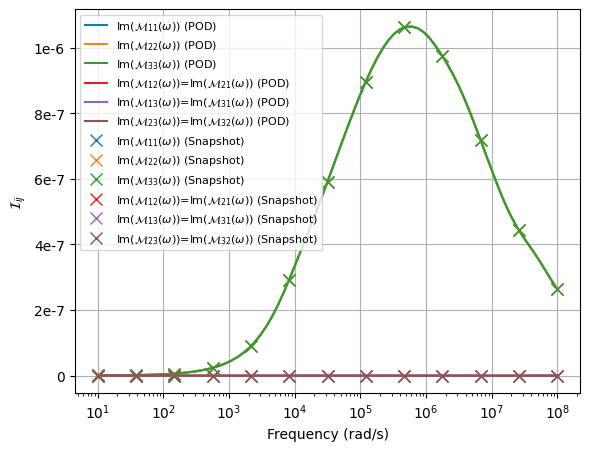

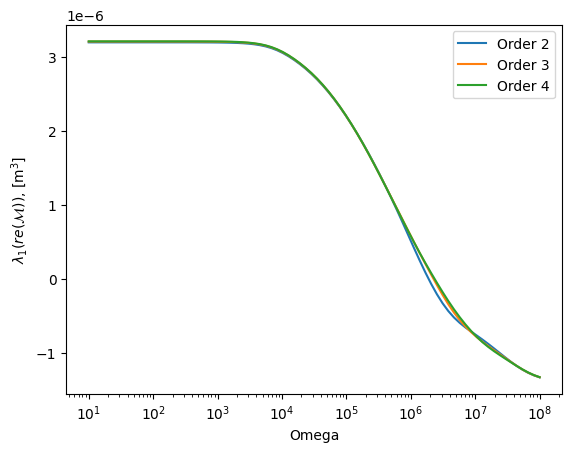

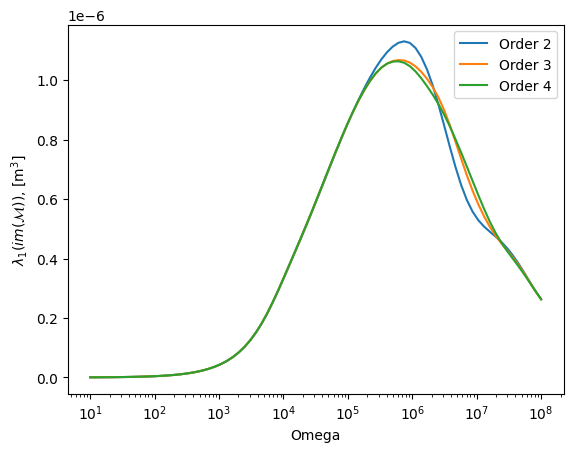

In [3]:
plt.figure(1)
plt.figure(2)

for p in [2,3,4]:
    result = main(geometry=geometry, h=mesh_coarseness, start_stop=start_stop, order=p, use_OCC=True, use_POD=True)
    plt.figure(1)
    plt.semilogx(result['FrequencyArray'], result['EigenValues'][:,0].real, label=f'Order {p}')
    plt.figure(2)
    plt.semilogx(result['FrequencyArray'], result['EigenValues'][:,0].imag, label=f'Order {p}')

plt.figure(1)
plt.xlabel('Omega')
plt.ylabel('$\lambda_1(re(\mathcal{M}))$, [m$^3$]')
plt.legend()

plt.figure(2)
plt.xlabel('Omega')
plt.ylabel('$\lambda_1(im(\mathcal{M}))$, [m$^3$]')
plt.legend()